# Pima Indians Diabetes

In [1]:
# need library
import numpy as np
import tensorflow as tf
# warning remove
if type(tf.contrib) != type(tf):
    tf.contrib._warning = None
# 딥러닝 구동에 필요한 케라스 함수
from keras.models import Sequential
from keras.layers import Dense    

Using TensorFlow backend.


## Error function

### mean_squared_error
- mean(square(yt-yo))

### mean_absolute_error
- mean(abs(yt-yo))

### mean_absolute_percentage_error
- mean(abs(yt-yo)/abs(yt)) (yt != 0)

### mean_squared_logarithmic_error
- mean(square((log(yo)+1)-(log(yt)+1)))

### categorical_crossentropy
- 범주형 교차 엔트로피(일반적인 분류)

### binary_crossentropy
- 이항 교차 엔트로피(두개의 클래스 중에서 예측할 때)

## 데이터 조사

In [3]:
import pandas as pd
df = pd.read_csv('dataset/pima-indians-diabetes.csv',
                names = ['pregnant','plasma','preesure','thickness',
                        'insulin','BMI','pedigree','age','class'])
df.head(5)

,pregnant,plasma,preesure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
preesure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,pregnant,plasma,preesure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df[['pregnant','class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
5,5,0
6,3,1
7,10,0
8,2,1
9,8,1


In [7]:
df[['pregnant','class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


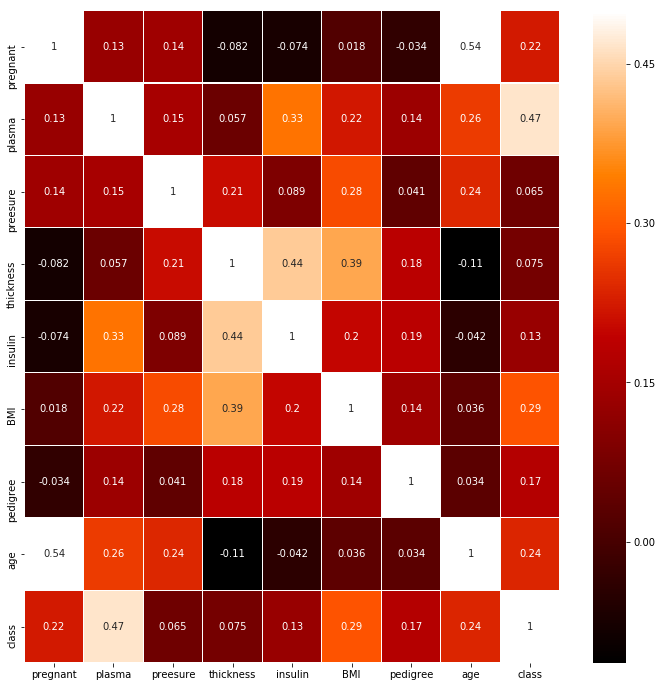

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()
# 색상설정 : https://matplotlib.org/users/colormaps.html

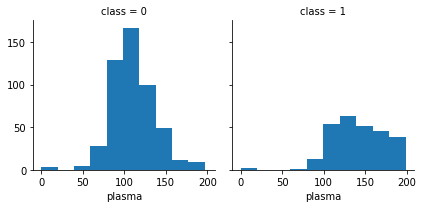

In [11]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

## 당뇨병 예측 실행

In [15]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

dataset = np.loadtxt('dataset/pima-indians-diabetes.csv', delimiter=',')
X = dataset[:,0:8]
Y = dataset[:,8]

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='softplus'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # metrics : overfitting 방지

model.fit(X, Y, epochs=200, batch_size=10)

print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
768/768 [==============================] - 0s 295us/step - loss: 2.4435 - acc: 0.5156
Epoch 2/200
768/768 [==============================] - 0s 61us/step - loss: 0.8817 - acc: 0.6302
Epoch 3/200
768/768 [==============================] - 0s 57us/step - loss: 0.7381 - acc: 0.6263
Epoch 4/200
768/768 [==============================] - 0s 61us/step - loss: 0.7101 - acc: 0.6302
Epoch 5/200
768/768 [==============================] - 0s 57us/step - loss: 0.6633 - acc: 0.6406
Epoch 6/200
768/768 [==============================] - 0s 61us/step - loss: 0.6382 - acc: 0.6471
Epoch 7/200
768/768 [==============================] - 0s 59us/step - loss: 0.6204 - acc: 0.6732
Epoch 8/200
768/768 [==============================] - 0s 60us/step - loss: 0.6196 - acc: 0.6549
Epoch 9/200
768/768 [==============================] - 0s 60us/step - loss: 0.6096 - acc: 0.6667
Epoch 10/200
768/768 [==============================] - 0s 60us/step - loss: 0.6005 - acc: 0.6732
Epoch 11/200
768/768 [======

768/768 [==============================] - 0s 55us/step - loss: 0.4949 - acc: 0.7591
Epoch 85/200
768/768 [==============================] - 0s 55us/step - loss: 0.4890 - acc: 0.7617
Epoch 86/200
768/768 [==============================] - 0s 53us/step - loss: 0.4952 - acc: 0.7539
Epoch 87/200
768/768 [==============================] - 0s 53us/step - loss: 0.4971 - acc: 0.7552
Epoch 88/200
768/768 [==============================] - 0s 55us/step - loss: 0.4911 - acc: 0.7604
Epoch 89/200
768/768 [==============================] - 0s 53us/step - loss: 0.4950 - acc: 0.7682
Epoch 90/200
768/768 [==============================] - 0s 53us/step - loss: 0.4893 - acc: 0.7526
Epoch 91/200
768/768 [==============================] - 0s 55us/step - loss: 0.4857 - acc: 0.7643
Epoch 92/200
768/768 [==============================] - 0s 53us/step - loss: 0.4946 - acc: 0.7565
Epoch 93/200
768/768 [==============================] - 0s 55us/step - loss: 0.4843 - acc: 0.7630
Epoch 94/200
768/768 [===========

768/768 [==============================] - 0s 56us/step - loss: 0.4599 - acc: 0.7578
Epoch 168/200
768/768 [==============================] - 0s 56us/step - loss: 0.4507 - acc: 0.7826
Epoch 169/200
768/768 [==============================] - 0s 55us/step - loss: 0.4634 - acc: 0.7695
Epoch 170/200
768/768 [==============================] - 0s 55us/step - loss: 0.4488 - acc: 0.7773
Epoch 171/200
768/768 [==============================] - 0s 56us/step - loss: 0.4590 - acc: 0.7669
Epoch 172/200
768/768 [==============================] - 0s 53us/step - loss: 0.4556 - acc: 0.7839
Epoch 173/200
768/768 [==============================] - 0s 53us/step - loss: 0.4637 - acc: 0.7669
Epoch 174/200
768/768 [==============================] - 0s 56us/step - loss: 0.4583 - acc: 0.7760
Epoch 175/200
768/768 [==============================] - 0s 55us/step - loss: 0.4525 - acc: 0.7773
Epoch 176/200
768/768 [==============================] - 0s 56us/step - loss: 0.4518 - acc: 0.7669
Epoch 177/200
768/768 [=